# Ford GoBike System
## by Aly Essam

## Preliminary Wrangling

>- Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.
- Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013.
- As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
bike_df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [5]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
## Removing Null Values 
bike_df.dropna(inplace = True, subset=['member_birth_year', 'start_station_id'])

In [7]:
## Correcting data types of the variables
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])


bike_df['member_birth_year']  = bike_df['member_birth_year'].astype('int64')
bike_df['start_station_id'] = bike_df['start_station_id'].astype('int64')
bike_df['end_station_id'] = bike_df['end_station_id'].astype('int64')

In [8]:
## making bike_share_for_all_trip as boolean instead of (Yes,No)
bike_df['bike_share_for_all_trip'] = (bike_df['bike_share_for_all_trip'] == 'Yes')

In [9]:
## making Age column based on birth year 
bike_df['age'] = 2020 - bike_df['member_birth_year']

In [10]:
## Making Day and Hour columns
bike_df['day_name']= bike_df['start_time'].dt.day_name()
bike_df['Hour']= bike_df['start_time'].dt.hour

### What is the structure of your dataset?

> - There are 183412 rows in the fordgobike trips dataset.
- The trips in the dataset have 16 variables (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender and bike_share_for_all_trip)
- There are 4646 bikes, 329 start and end stations

### What is/are the main feature(s) of interest in your dataset?

>  The main feature of interest in the dataset is trip duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  The features will help me are user_type, age and gender, day and hour when the trip started

## Univariate Exploration

### Trip Duration 

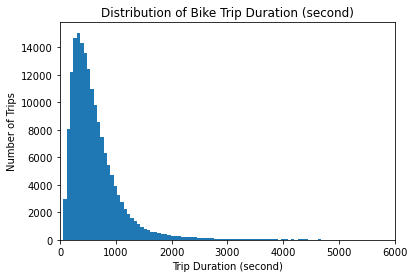

In [11]:
bins_sec = np.arange(0,bike_df['duration_sec'].max() + 60,60)
plt.hist(data = bike_df, x = 'duration_sec', bins = bins_sec);
plt.xlim(0,6000)
plt.title('Distribution of Bike Trip Duration (second)')
plt.xlabel('Trip Duration (second)')
plt.ylabel('Number of Trips');

> The trip duration in seconds does not give us the in formation we need. so, we will convert it to minutes to see the chart in detail.

In [12]:
bike_df['duration_min'] = bike_df['duration_sec'] / 60 

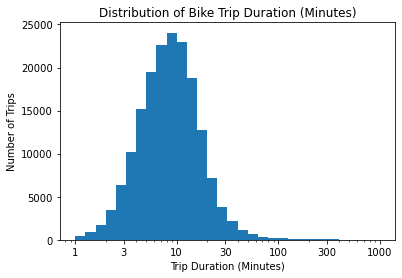

In [13]:
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
bins_min = 10 ** np.arange(0, 3 + 0.1,0.1)
plt.hist(data = bike_df, x = 'duration_min', bins = bins_min);
plt.title('Distribution of Bike Trip Duration (Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Number of Trips');
plt.xscale('log')
plt.xticks(ticks,labels);

> According to the figure above, The majority of the trips lasts less than 10 minutes and the trips lasts from 1 to 100 minutes

### Age Distribution

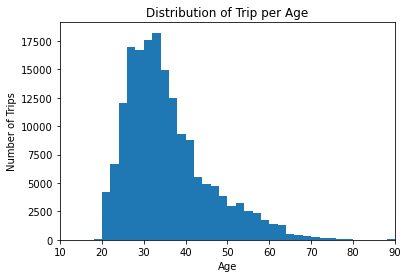

In [14]:
bins_a = np.arange (0, bike_df['age'].max() + 2 , 2)
plt.hist(data = bike_df, x = 'age', bins = bins_a);
plt.xlim(10,90)
plt.title('Distribution of Trip per Age')
plt.xlabel('Age')
plt.ylabel('Number of Trips');

> According to the figure above, Most of the users are between 20 and 40 years old.

### Type of users

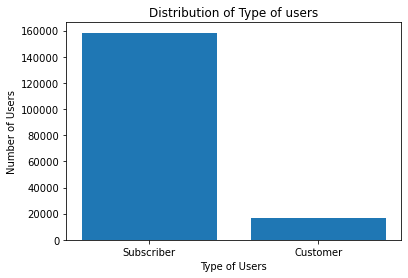

In [15]:
plt.bar(x = bike_df['user_type'].value_counts().keys(), height = bike_df['user_type'].value_counts());
plt.title('Distribution of Type of users')
plt.xlabel('Type of Users')
plt.ylabel('Number of Users');

> According to the figure above, Most of the users are subscribers 

### Gender

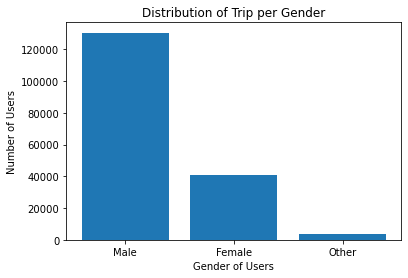

In [16]:
plt.bar(x = bike_df['member_gender'].value_counts().keys(), height = bike_df['member_gender'].value_counts());
plt.title('Distribution of Trip per Gender')
plt.xlabel('Gender of Users')
plt.ylabel('Number of Users');

> According to the figure above, Most of the users are Males

### Day

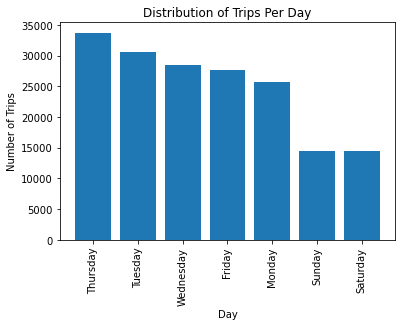

In [17]:

plt.bar(x = bike_df['day_name'].value_counts().keys(), height = bike_df['day_name'].value_counts())
plt.title('Distribution of Trips Per Day')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 90);

> According to the figure above, it is shown that Thrusday have the most trips per day and The least trips per day are duting the weekends

### Hour

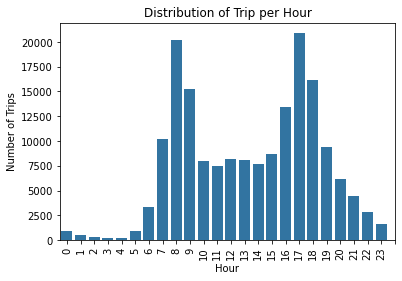

In [18]:
base_color = sb.color_palette()[0]
sb.countplot(data = bike_df, x = 'Hour', color = base_color)
plt.title('Distribution of Trip per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.xticks(range(0,25,1),rotation = 90);

> According to the figures above, it is shown that
- The most trips per hour are at 8:00 and 17:00 which they are the start and the end of the working day 
- The least trips per hour are from 0:00 to 5:00 when the users are asleep

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  
- The trip duration initial visulization was concentrated around an area That doesn't give enough information or insight so It was changed to minutes instead of seconds and log transformation is used for a better look at the data.
- Creating user_age column to be able get an insight on the impact of age.
- Creating Day and Hour Columns from the start time to be able get an insight the impact of time 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Looking at the distribution of birth year was challenging, so, Converting it to age by substracting the birth year from current year will gave us a better perception of the impact of age on the trip duration.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Age and average duration

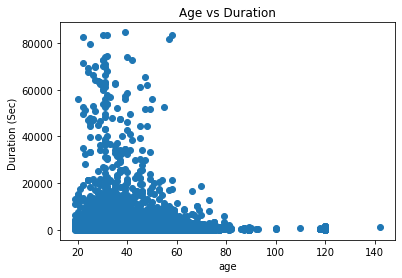

In [19]:
plt.scatter(data = bike_df, x = 'age', y = 'duration_sec')
plt.title('Age vs Duration')
plt.xlabel('age')
plt.ylabel('Duration (Sec) ');

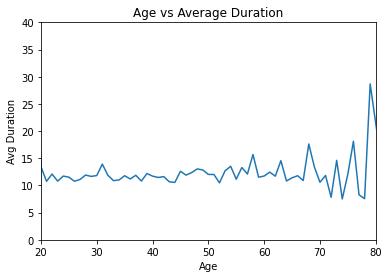

In [20]:
age_duration = bike_df.groupby(['age'])['duration_min'].mean()
age_duration_df = age_duration.reset_index()
age_duration_df

sb.lineplot(x = age_duration_df['age'], y = age_duration_df['duration_min'])

plt.xlim(20,80)
plt.ylim(0,40)
plt.title('Age vs Average Duration')
plt.xlabel('Age')
plt.ylabel('Avg Duration') ;


> According to the Age Distribution in the first part and the figure above, It is shown that
> - Most of the users are between 20 and 45 years old, the trips for these users takes around 12 mins on average 
- The users between 60 to 80 years old tend to have longer trips than the other users 

### Type of users and duration

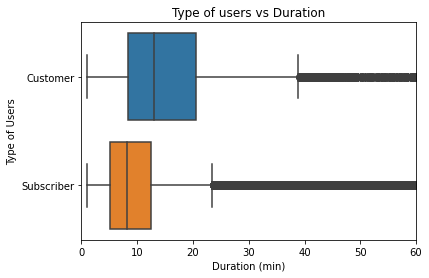

In [21]:
sb.boxplot(data = bike_df, x = 'duration_min', y = 'user_type')

plt.xlim(0,60)
plt.title('Type of users vs Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Type of Users') ;

According to the figure above, It is shown that

- The customers have higher range of trip duration and higher median trip duration than the subscribers  

### Gender and duration

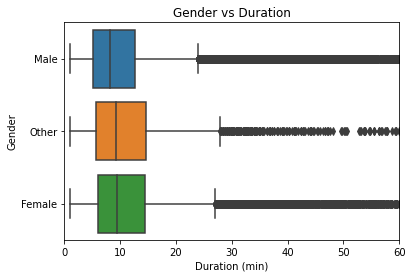

In [22]:
color_base = sb.color_palette()[0]
sb.boxplot(data = bike_df, x = 'duration_min', y = 'member_gender')

plt.xlim(0,60)
plt.title('Gender vs Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Gender') ;

According to the figure above, It is shown that

- The Females have the highest median trip duration
- The Other genders have the highest range of trip duration and the females are also close to this range
- The Males have the lowest median trip duration and lowest range of trip duration

### Day and duration

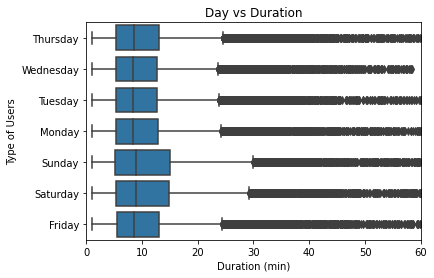

In [23]:
color_base = sb.color_palette()[0]
sb.boxplot(data = bike_df, x = 'duration_min', y = 'day_name', color = color_base)

plt.xlim(0,60)
plt.title('Day vs Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Type of Users') ;



> According to the figure above, It is shown that

- The weekends ( Saturday and Sunday ) have the highest range of trip and they also have higher median than the working days 

### Hour and Average duration

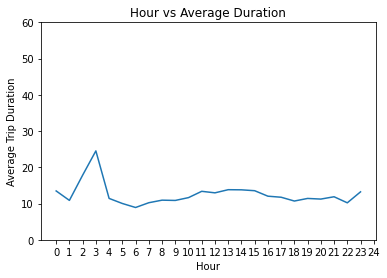

In [24]:
hour_duration = bike_df.groupby(['Hour'])['duration_min'].mean()
hour_duration_df = hour_duration.reset_index()


sb.lineplot(x = hour_duration_df['Hour'], y = hour_duration_df['duration_min'])


plt.ylim(0,60)
plt.title('Hour vs Average Duration')
plt.xlabel('Hour')
plt.ylabel('Average Trip Duration') 
plt.xticks(range(0,25,1)) ;

> According to the figure above, It is shown that
-  The Average trip duration is almost the same except the time between 3:00 as it increased rapidly due to the low trips in this hour
- There are a slight increase in the average duration during the working hours between 10:00 and 15:00

### Age and Gender of users

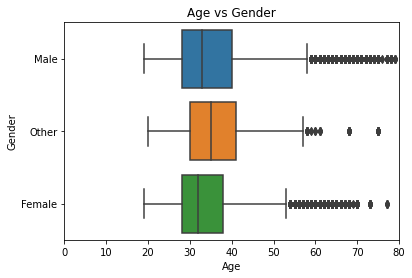

In [25]:
color_base = sb.color_palette()[0]
sb.boxplot(data = bike_df, x = 'age', y = 'member_gender')

plt.xlim(0,80)
plt.title('Age vs Gender')
plt.xlabel('Age')
plt.ylabel('Gender') ;

According to the figure above, It is shown that

- The Other genders have the highest median of users's age and 
- The Males have the highest range of users's age
- The Females have the lowest median and the lowest range of user's age 

### Age and Day

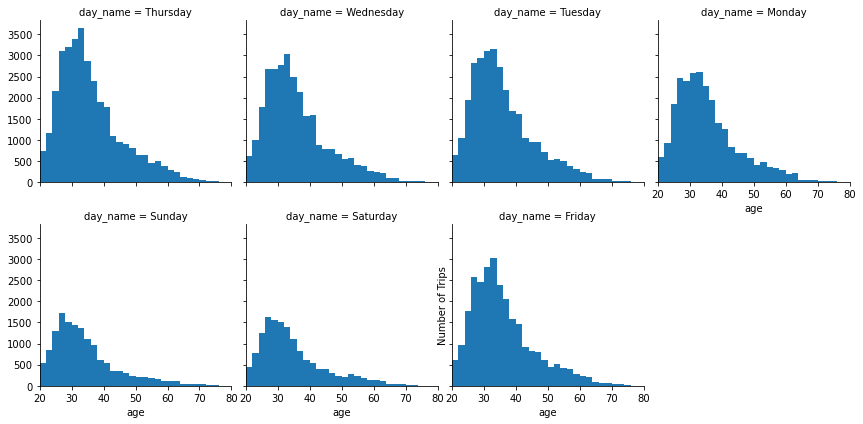

In [26]:

g = sb.FacetGrid(data = bike_df, col = 'day_name', col_wrap = 4);
g.map(plt.hist, 'age', bins = bins_a) ;
plt.xlim(20,80) 
plt.ylabel('Number of Trips') ;

> According to the figures above, It is shown that 
- Most of the users during the weekends are between 20 and 30 years old which are younger than the users during the workdays

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Most of the users are between 20 and 45 years old, the trips for these users takes around 12 mins on average and The users between 60 to 80 years old tend to have longer trips than the other users 

> - The customers have higher range of trip duration and higher median duration than the subscribers 

> - The Females have the highest median trip duration while the Other genders have the highest range of trip duration 
- The Males have the lowest median trip duration and lowest range of trip duration although they are the majority of users

> - The weekends ( Saturday and Sunday ) have the highest range of trip and they also have higher median than the working days 

> -  The Average trip duration is almost the same except the time between 3:00 as it increased rapidly due to the low trips in these hour
- There are a slight increase in the average duration during the working hours between 10:00 and 15:00

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - The Other genders have the highest median of users's age and 
- The Males have the highest range of users's age
- The Females have the lowest median and the lowest range of user's age

> - Most of the users during the weekends are between 20 and 30 years old which are younger than the users during the workdays

## Multivariate Exploration

### Hour, Type of User vs duration

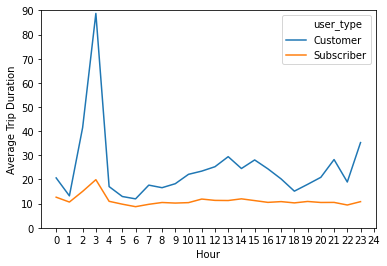

In [27]:
hour_duration = bike_df.groupby(['Hour', 'user_type'])['duration_min'].mean()
hour_duration_df = hour_duration.reset_index()


sb.lineplot(x = hour_duration_df['Hour'], y = hour_duration_df['duration_min'], hue = hour_duration_df['user_type'] )


plt.ylim(0,90)
plt.xlabel('Hour')
plt.ylabel('Average Trip Duration') ;
plt.xticks(range(0,25,1)) ;

> According to the figure above, It is shown that

- The Average Trip duration for the customers through the hours of the day is much higher than the subscribers
- The Average trip duration increased rapidly at 3:00 due to the low trips in this hour

<Figure size 1440x720 with 0 Axes>

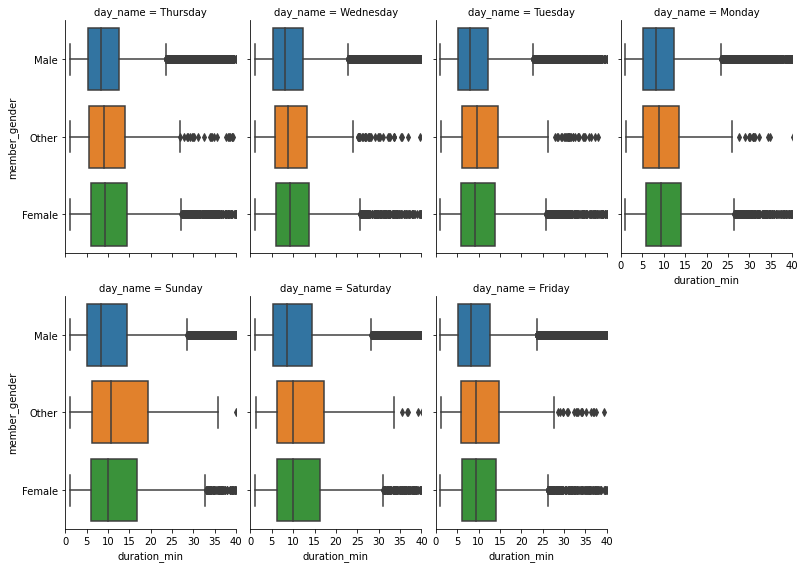

In [28]:
plt.figure(figsize = (20,10))
sb.catplot(data = bike_df, col = 'day_name', x = 'duration_min', y = 'member_gender',
           kind = 'box',col_wrap = 4,  height=4, aspect=.7)

plt.xlim(0,40)
plt.xticks(range(0,45,5)) ;

 > According to the figures above
- The Females have the highest median trip duration while the Other genders have the highest range of trip duration Through days pf week
- The Males have the lowest median trip duration and lowest range of trip duration through days of week although they are the majority of users
- The weekends ( Saturday and Sunday ) have the highest range of trip and they also have higher median than the working days
- The median of all genders doesn't have significant changes through days of week

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - The Females have the highest median trip duration while the Other genders have the highest range of trip duration Through days pf week
- The Males have the lowest median trip duration and lowest range of trip duration through days of week although they are the majority of users
- The weekends ( Saturday and Sunday ) have the highest range of trip and they also have higher median than the working days
- The median of all genders doesn't have significant changes through days of week

### Were there any interesting or surprising interactions between features?

> - The Average Trip duration for the customers through the hours of the day is much higher than the subscribers

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!